In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Alcoholics/SMNI_CMI_TRAIN/Data401.csv
/kaggle/input/Alcoholics/SMNI_CMI_TRAIN/Data370.csv
/kaggle/input/Alcoholics/SMNI_CMI_TRAIN/Data45.csv
/kaggle/input/Alcoholics/SMNI_CMI_TRAIN/Data387.csv
/kaggle/input/Alcoholics/SMNI_CMI_TRAIN/Data102.csv
/kaggle/input/Alcoholics/SMNI_CMI_TRAIN/Data458.csv
/kaggle/input/Alcoholics/SMNI_CMI_TRAIN/Data357.csv
/kaggle/input/Alcoholics/SMNI_CMI_TRAIN/Data351.csv
/kaggle/input/Alcoholics/SMNI_CMI_TRAIN/Data178.csv
/kaggle/input/Alcoholics/SMNI_CMI_TRAIN/Data231.csv
/kaggle/input/Alcoholics/SMNI_CMI_TRAIN/Data349.csv
/kaggle/input/Alcoholics/SMNI_CMI_TRAIN/Data272.csv
/kaggle/input/Alcoholics/SMNI_CMI_TRAIN/Data252.csv
/kaggle/input/Alcoholics/SMNI_CMI_TRAIN/Data46.csv
/kaggle/input/Alcoholics/SMNI_CMI_TRAIN/Data161.csv
/kaggle/input/Alcoholics/SMNI_CMI_TRAIN/Data146.csv
/kaggle/input/Alcoholics/SMNI_CMI_TRAIN/Data124.csv
/kaggle/input/Alcoholics/SMNI_CMI_TRAIN/Data372.csv
/kaggle/input/Alcoholics/SMNI_CMI_TRAIN/Data384.csv
/kaggle/input/

In [2]:
filenames_list = os.listdir('../input/Alcoholics/SMNI_CMI_TRAIN/Train/')

Data = pd.DataFrame({})

for file_names in tqdm(filenames_list):
    temp_df = pd.read_csv('../input/Alcoholics/SMNI_CMI_TRAIN/Train/' + file_names)
    Data = Data.append(temp_df)


100%|██████████| 468/468 [09:47<00:00,  1.25s/it]


In [3]:
#using .head() to vie first few records of the dataset
Data.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,23,FP1,0,-1.973,c,S2 match,0,co2c0000342,0.000000
1,6,23,FP1,1,-0.997,c,S2 match,0,co2c0000342,0.003906
2,7,23,FP1,2,0.956,c,S2 match,0,co2c0000342,0.007812
3,8,23,FP1,3,2.909,c,S2 match,0,co2c0000342,0.011719
4,9,23,FP1,4,2.421,c,S2 match,0,co2c0000342,0.015625


In [4]:
#Using .tail()  method to view few last records from the Dataframe
Data.tail()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
16379,16447,6,Y,251,12.065,a,S1 obj,63,co2a0000370,0.980469
16380,16448,6,Y,252,9.623,a,S1 obj,63,co2a0000370,0.984375
16381,16449,6,Y,253,8.158,a,S1 obj,63,co2a0000370,0.988281
16382,16450,6,Y,254,8.647,a,S1 obj,63,co2a0000370,0.992188
16383,16451,6,Y,255,10.111,a,S1 obj,63,co2a0000370,0.996094


In [5]:
#Using dtypes() method to display different datatypes available in the dataset
Data.dtypes

Unnamed: 0              int64
trial number            int64
sensor position        object
sample num              int64
sensor value          float64
subject identifier     object
matching condition     object
channel                 int64
name                   object
time                  float64
dtype: object

In [6]:
#Now dropping unnamed column because it is unnecessary and will be unused in the future
Data = Data.drop(['Unnamed: 0'], axis=1)


In [7]:
Data.head()

,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,23,FP1,0,-1.973,c,S2 match,0,co2c0000342,0.000000
1,23,FP1,1,-0.997,c,S2 match,0,co2c0000342,0.003906
2,23,FP1,2,0.956,c,S2 match,0,co2c0000342,0.007812
3,23,FP1,3,2.909,c,S2 match,0,co2c0000342,0.011719
4,23,FP1,4,2.421,c,S2 match,0,co2c0000342,0.015625


Unnamed Column has been removed from the Dataset

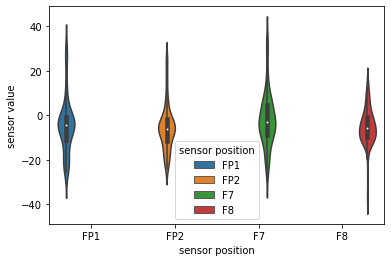

In [8]:
#Importing Data Visualization Libraries seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(x="sensor position",y="sensor value", hue="sensor position", data=Data[:1000]); #Selecting only first 1000 columns from Dataset
plt.show()


here Violin plot displays the distribution of data across labels .here i have taken sensor positions as labels on x-axis and value of values of 'sensor value' on y-axis.


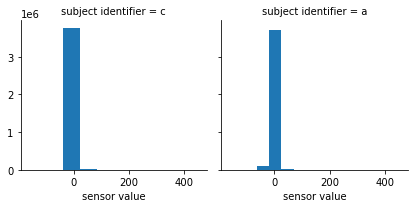

In [9]:
g = sns.FacetGrid(Data,col='subject identifier')
g.map(plt.hist,"sensor value")

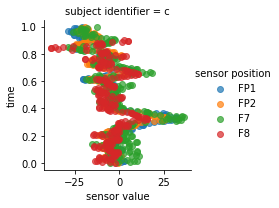

In [10]:
g = sns.FacetGrid(Data[:1000],col='subject identifier',hue='sensor position')
g.map(plt.scatter,"sensor value","time",alpha=0.7)
g.add_legend();

In [11]:
Data_s = Data[0:1000]
#Data_s = Data_s.drop(['trial number','sensor position','sample num','subject identifier','matching condition','channel','name'],axis=1)
Data_s.head()


,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,23,FP1,0,-1.973,c,S2 match,0,co2c0000342,0.000000
1,23,FP1,1,-0.997,c,S2 match,0,co2c0000342,0.003906
2,23,FP1,2,0.956,c,S2 match,0,co2c0000342,0.007812
3,23,FP1,3,2.909,c,S2 match,0,co2c0000342,0.011719
4,23,FP1,4,2.421,c,S2 match,0,co2c0000342,0.015625


# Plotting Pairwise Data Relationships

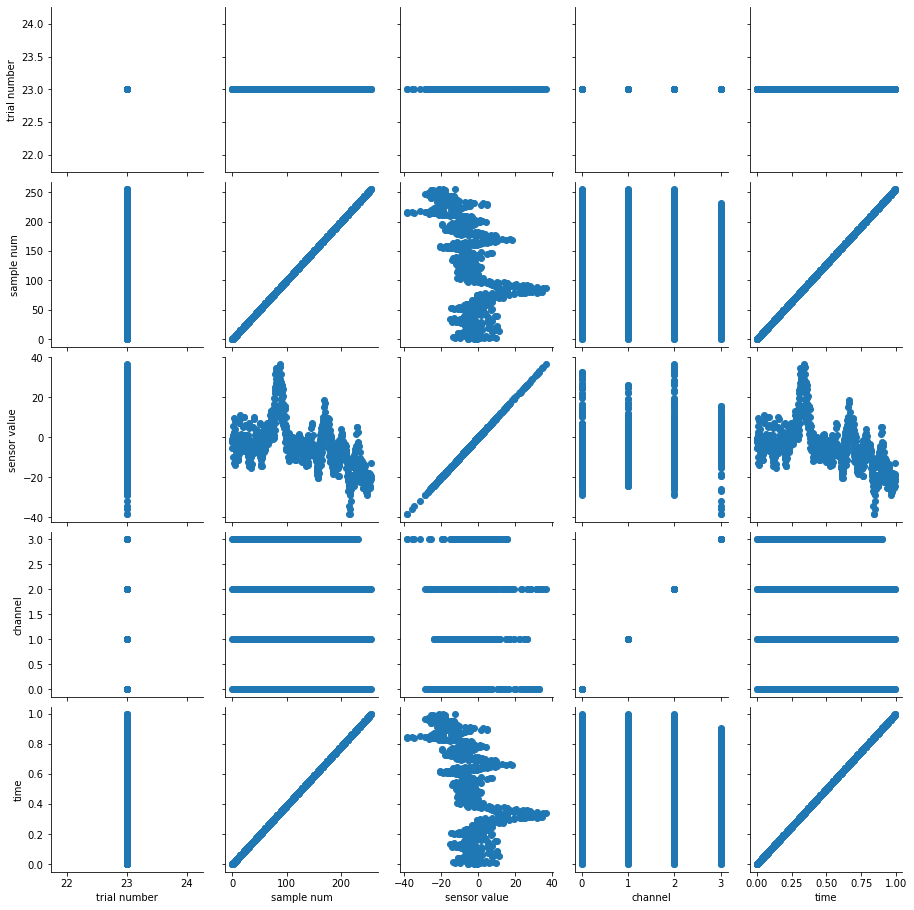

In [12]:
g = sns.PairGrid(Data_s)
g.map(plt.scatter)

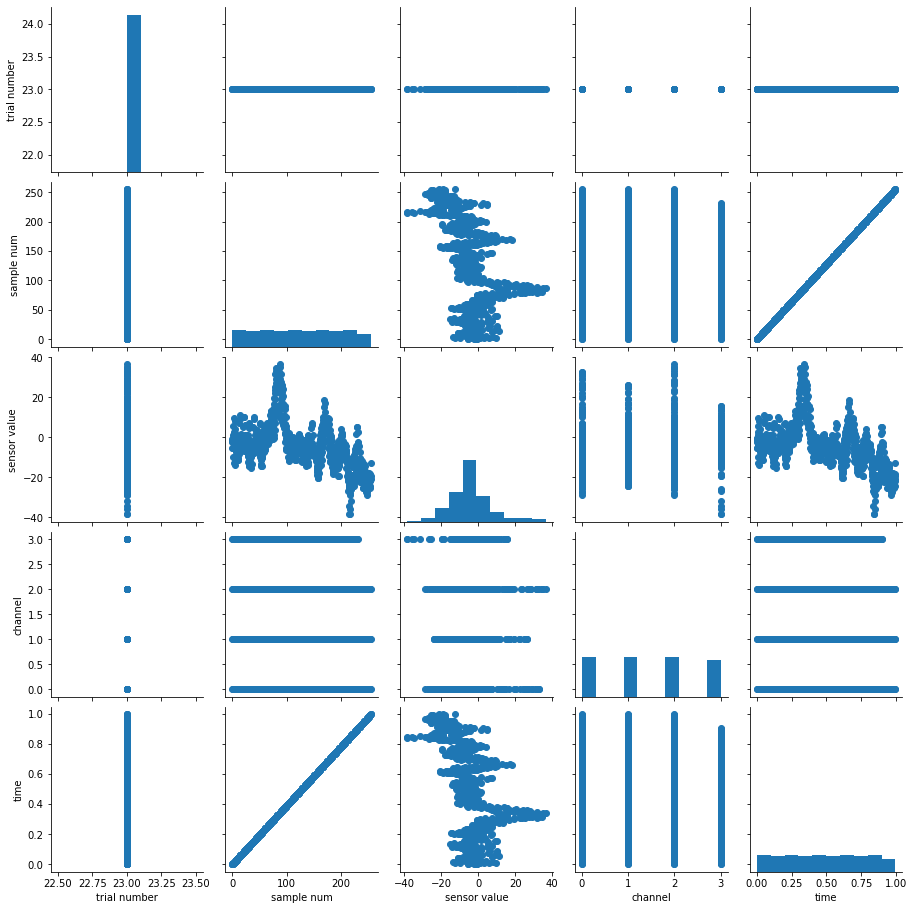

In [13]:
g = sns.PairGrid(Data_s)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

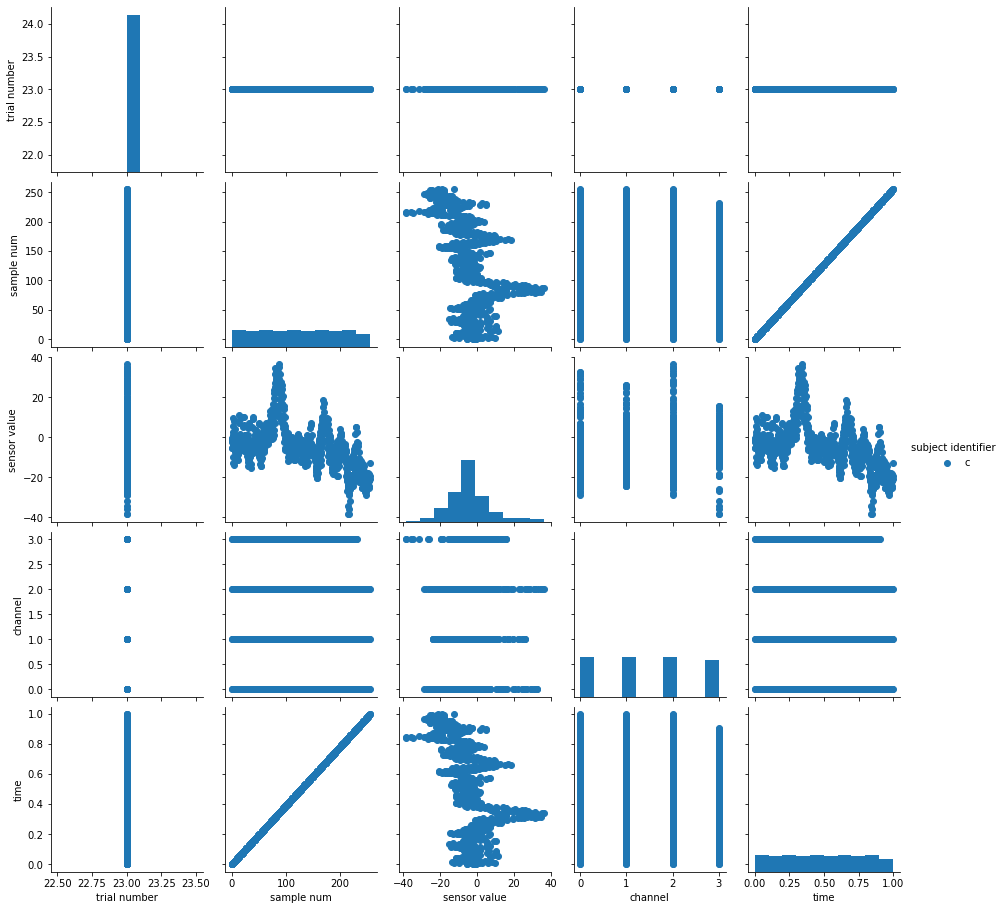

In [14]:
g = sns.PairGrid(Data_s,hue='subject identifier')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

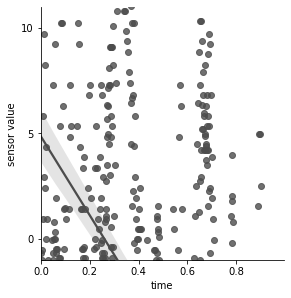

In [15]:
g = sns.PairGrid(Data_s,y_vars=['sensor value'],x_vars=['time'],height=4)
g.map(sns.regplot,color="0.3")
g.set(ylim=(-1,11),yticks=[0,5,10])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


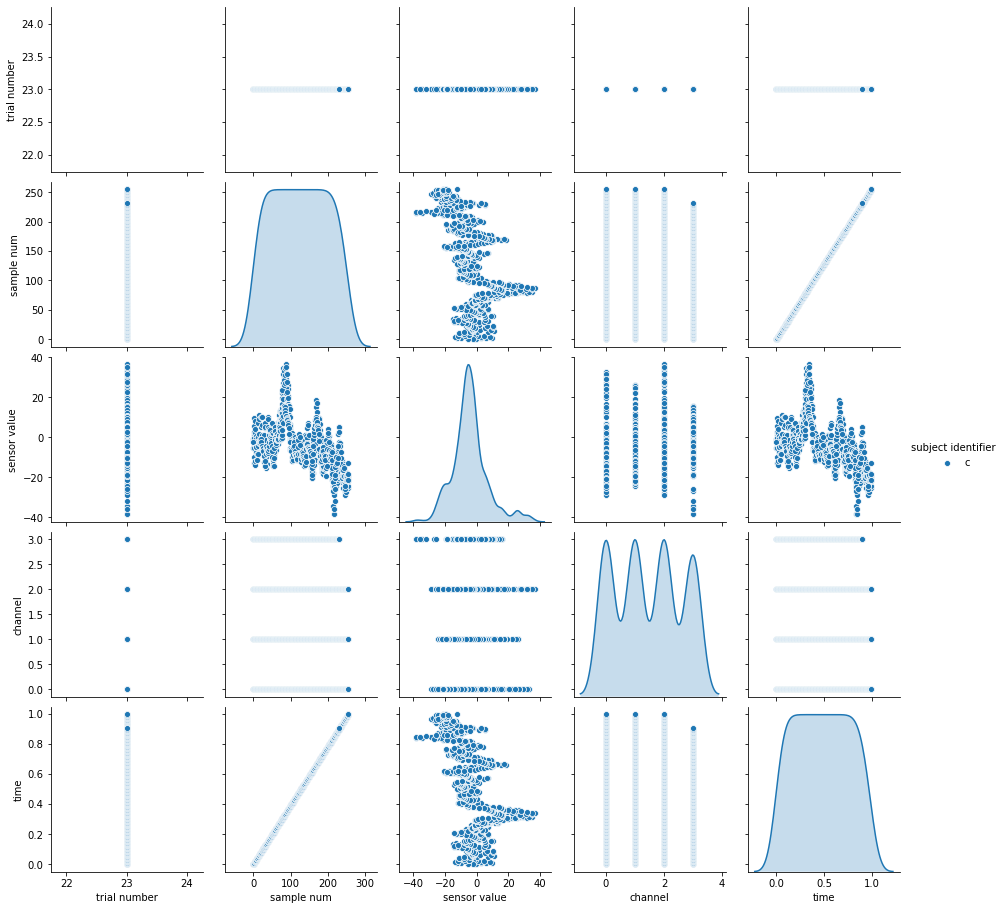

In [16]:
sns.pairplot(Data_s,hue='subject identifier',height=2.5)

# Preprocessing Data
We noticed that most of columns in our  data are strings but algorithms in scikit learn understand only numerical data. Luckily ,scikit-learn library provides us with many methods for converting string data into numerical data.
**One Such method is LabelEncoder()**

In [17]:
#Importing LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Data['sensor position'] = le.fit_transform(Data['sensor position'])
Data['subject identifier'] = le.fit_transform(Data['subject identifier'])
Data['matching condition'] = le.fit_transform(Data['matching condition'])
Data['name'] = le.fit_transform(Data['name'])

In [18]:
Data.head()

,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,23,34,0,-1.973,1,1,0,13,0.000000
1,23,34,1,-0.997,1,1,0,13,0.003906
2,23,34,2,0.956,1,1,0,13,0.007812
3,23,34,3,2.909,1,1,0,13,0.011719
4,23,34,4,2.421,1,1,0,13,0.015625


In [19]:
Data.tail()


,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
16379,6,62,251,12.065,0,0,63,4,0.980469
16380,6,62,252,9.623,0,0,63,4,0.984375
16381,6,62,253,8.158,0,0,63,4,0.988281
16382,6,62,254,8.647,0,0,63,4,0.992188
16383,6,62,255,10.111,0,0,63,4,0.996094


# Variable Description


* trial number - number of trials
* sensor position - position of electrode placed on subject's scalp
* sample num 0-255
* sensor value - value in microvolts
* subject identifier - a:-Alcoholic c:-Control
* matching condition - 
 ->S1 obj:- a single object thrown, 
 -> S2 match - object 2 shown in matching condition(S2 and S1 are identical), 
 -> S2 nomatch - object2 shown in non-matching condition(S1 different from S2)
* channel - channel number(0-63)
* name - serial code assigned to each subject
* time - inverse of sample num measured in seconds


According to the above information ,we can drop trial number


# Training Set and Test Set

In [20]:
#Select all columns other than Subject identifier which is our target
cols = [col for col in Data.columns if col not in ['subject identifer']]
data = Data[['trial number','sensor position','sample num','sensor value','matching condition','channel','name','time']]
target = Data['subject identifier']
data.shape

(7667712, 8)

In [21]:
#inport the necessary module to train-test split
from sklearn.model_selection import train_test_split
#Split data into train and test sets:- data_train,data_test,target_train,target_test
#Splitting Data with 75-25% train-test split
data_train,data_test,target_train,target_test = train_test_split(data,target,test_size=0.25,random_state=10)
print("Shape of data training set {}".format(data_train.shape))    
print("Shape of data test set {}".format(data_test.shape)) 
print("Shape of target training set {}".format(target_train.shape)) 
print("Shape of target test set {}".format(target_train.shape)) 

Shape of data training set (5750784, 8)
Shape of data test set (1916928, 8)
Shape of target training set (5750784,)
Shape of target test set (5750784,)


# Applying Machine Learning Algorithms on the Data Set

**Naive Bayes** :-     
Naive-Bayes algorithm calculates the probability of the connection of a feature with a target variable and then it selects the feature with the highest probability.

[1 0 0 ... 1 1 0]
Naive Bayes Accuracy  0.9981835520165598
[[959181   3482]
 [     0 954265]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


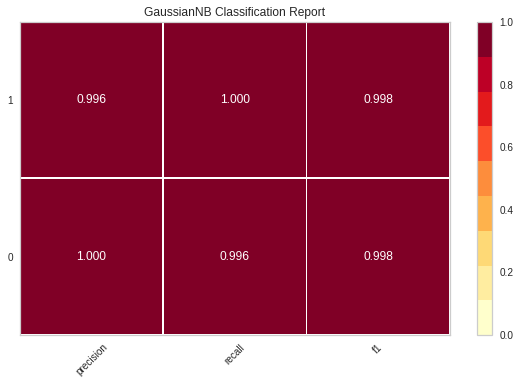

In [22]:
#import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Create an object of GaussianNB
gnb = GaussianNB()
#train the algorithm on taining data and predict using the testing data
#Fitting the data
gnb.fit(data_train,target_train)
#prediction 
pred = gnb.predict(data_test)
print(pred)

#print the accuracy score
print("Naive Bayes Accuracy ",accuracy_score(target_test,pred,normalize = True))

#Confusion Matrix
print(confusion_matrix(target_test,pred))

from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=['0','1'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

*Linear SVC or Linear Support Vector Classification**    
LinearSVC or Linear Support Vector Classification is a subclass of the SVM (Support Vector Machine) class. LinearSVC tries to divide the data into different planes so that it can find a best possible grouping of different classes. 

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[1 0 0 ... 1 1 0]
LinearSVM Accuracy  1.0
[[962663      0]
 [     0 954265]]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


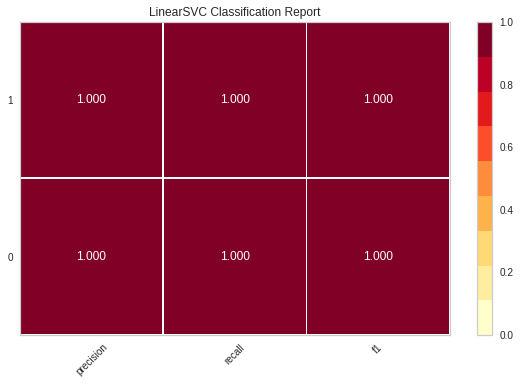

In [23]:

#import the necessary module
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Create an object of GaussianNB
svc_model = LinearSVC(random_state=0)
#train the algorithm on taining data and predict using the testing data
#Fitting the data
svc_model.fit(data_train,target_train)
#prediction 
pred = svc_model.predict(data_test)
print(pred)

#print the accuracy score
print("LinearSVM Accuracy ",accuracy_score(target_test,pred,normalize = True))

#Confusion Matrix
print(confusion_matrix(target_test,pred))

from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=['0','1'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data



**K-Nearest Neighbors**  
The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It's easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

[1 0 1 ... 1 1 0]
KNeighbors Accuracy  0.9911968524639423
[[955070   7593]
 [  9282 944983]]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


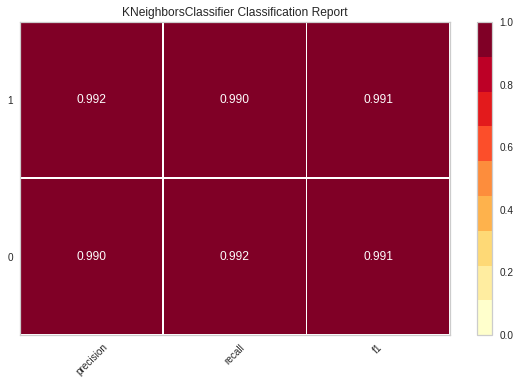

In [24]:

#import the necessary module
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Create an object of GaussianNB
k_neigh = KNeighborsClassifier(n_neighbors=3)
#train the algorithm on taining data and predict using the testing data
#Fitting the data
k_neigh.fit(data_train,target_train)
#prediction 
pred = k_neigh.predict(data_test)
print(pred)

#print the accuracy score
print("KNeighbors Accuracy ",accuracy_score(target_test,pred,normalize = True))

#Confusion Matrix
print(confusion_matrix(target_test,pred))

from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(k_neigh, classes=['0','1'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data



**Decision Tree Classifier**  
A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

[1 0 0 ... 1 1 0]
Decision Tree Accuracy  1.0
[[962663      0]
 [     0 954265]]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


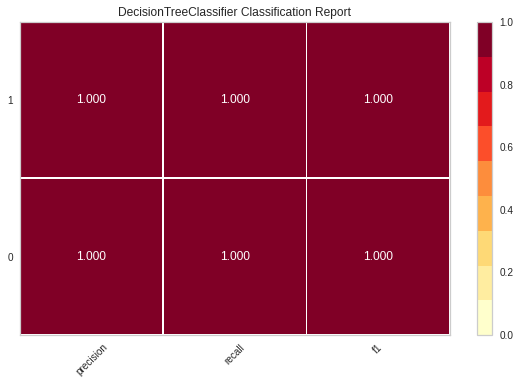

In [25]:

#import the necessary module
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Create an object of GaussianNB
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
#train the algorithm on taining data and predict using the testing data
#Fitting the data
dec_tree.fit(data_train,target_train)
#prediction 
pred = dec_tree.predict(data_test)
print(pred)

#print the accuracy score
print("Decision Tree Accuracy ",accuracy_score(target_test,pred,normalize = True))

#Confusion Matrix
print(confusion_matrix(target_test,pred))

from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(dec_tree, classes=['0','1'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data



[Text(223.2, 224.235, 'X[6] <= 7.5\nentropy = 1.0\nsamples = 5750784\nvalue = [2887577, 2863207]'),
 Text(111.6, 74.745, 'entropy = 0.0\nsamples = 2887577\nvalue = [2887577, 0]'),
 Text(334.79999999999995, 74.745, 'entropy = 0.0\nsamples = 2863207\nvalue = [0, 2863207]')]

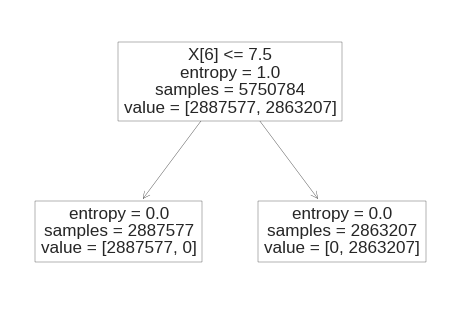

In [26]:
#Decision tree visualization
from sklearn import tree
tree.plot_tree(dec_tree)

**Random Forest**  
Random forests or random decision forests are an ensemble learning method for classification, regression 
and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

[1 0 0 ... 1 1 0]
Random Forest Accuracy  1.0
[[962663      0]
 [     0 954265]]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


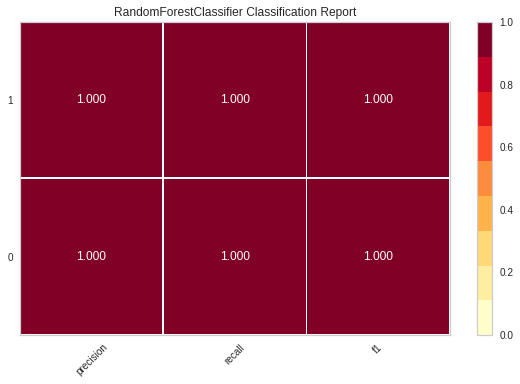

In [27]:

#import the necessary module
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Create an object of GaussianNB
rand_forest = RandomForestClassifier(criterion="entropy", max_depth=3)
#train the algorithm on taining data and predict using the testing data
#Fitting the data
rand_forest.fit(data_train,target_train)
#prediction 
pred = rand_forest.predict(data_test)
print(pred)

#print the accuracy score
print("Random Forest Accuracy ",accuracy_score(target_test,pred,normalize = True))

#Confusion Matrix
print(confusion_matrix(target_test,pred))

from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(rand_forest, classes=['0','1'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

